In [1]:
%run ../src/__init__.py

In [2]:
%run ../src/load_data.py

/home/jovyan/dsi/Capstone/src/load_data.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  data['attendance'][x] = data.iloc[x + 1]['attendance']
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.6/site-packages/pandas/core/g

In [3]:
brewers_df = final_drop[final_drop['team']=='MIL'].sort_values('date',axis=0)

In [4]:
brewers_df =  team_data_clean(brewers_df)

/home/jovyan/dsi/Capstone/src/__init__.py:29: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [5]:
brewers_df = add_rival('MIL', brewers_df)

In [6]:
new_data=pd.read_pickle('../data/test_data_mlb.pkl')

In [7]:
brewers_new = new_data[new_data['team'] == 'MIL'].sort_values('date',axis=0)

In [8]:
brewers_new =  test_data_clean(brewers_new)

/home/jovyan/dsi/Capstone/src/__init__.py:56: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,min_periods=0,center=False).mean()
  temp_ma = pd.rolling_mean(temp_run_ma_df['runs'],window=5,min_periods=0)


In [9]:
brewers_new = add_rival('MIL', brewers_new)

In [10]:
brewers_data = pd.concat([brewers_df, brewers_new],axis=0)

In [11]:
brewers_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2234 entries, 31204 to 1295
Data columns (total 70 columns):
attendance         2234 non-null int64
date               2234 non-null datetime64[ns]
div_rank           2234 non-null int64
double_header      2234 non-null float64
gb                 2234 non-null float64
opening_day        2234 non-null float64
opponent           2234 non-null object
record             2234 non-null float64
runs_allowed_ma    2234 non-null float64
runs_ma            2234 non-null float64
runs_pg            2234 non-null float64
streak             2234 non-null int64
team               2234 non-null object
1990               2234 non-null int64
1991               2234 non-null int64
1992               2234 non-null int64
1993               2234 non-null int64
1994               2234 non-null int64
1995               2234 non-null int64
1996               2234 non-null int64
1997               2234 non-null int64
1998               2234 non-null int64
1999  

,count,mean,std,min,25%,50%,75%,max,skew
runs,2234.0,4.576544,3.020560,0.0,2.000000,4.000000,6.000000,20.0,0.915645
runs_allowed,2234.0,4.739928,3.154188,0.0,2.000000,4.000000,7.000000,20.0,0.814096
innings,2234.0,9.176813,0.830767,0.0,9.000000,9.000000,9.000000,19.0,3.714802
record,2234.0,0.473823,0.103441,0.0,0.433010,0.473879,0.518519,1.0,-0.290269
div_rank,2234.0,3.597583,1.583789,0.0,2.000000,4.000000,5.000000,7.0,-0.048407
gb,2234.0,-8.815801,8.277702,-37.5,-14.000000,-7.500000,-2.500000,10.5,-0.623488
time,2234.0,180.001791,28.057184,0.0,163.000000,178.000000,193.000000,365.0,1.163699
attendance,2234.0,27316.179051,10644.763314,3913.0,18767.000000,27242.500000,35533.250000,56354.0,0.044651
runs_pg,2234.0,4.560747,0.731579,0.0,4.278333,4.528379,4.817253,11.5,0.124192
runs_ma,2234.0,4.581879,1.436148,1.2,3.600000,4.400000,5.600000,11.0,0.564889


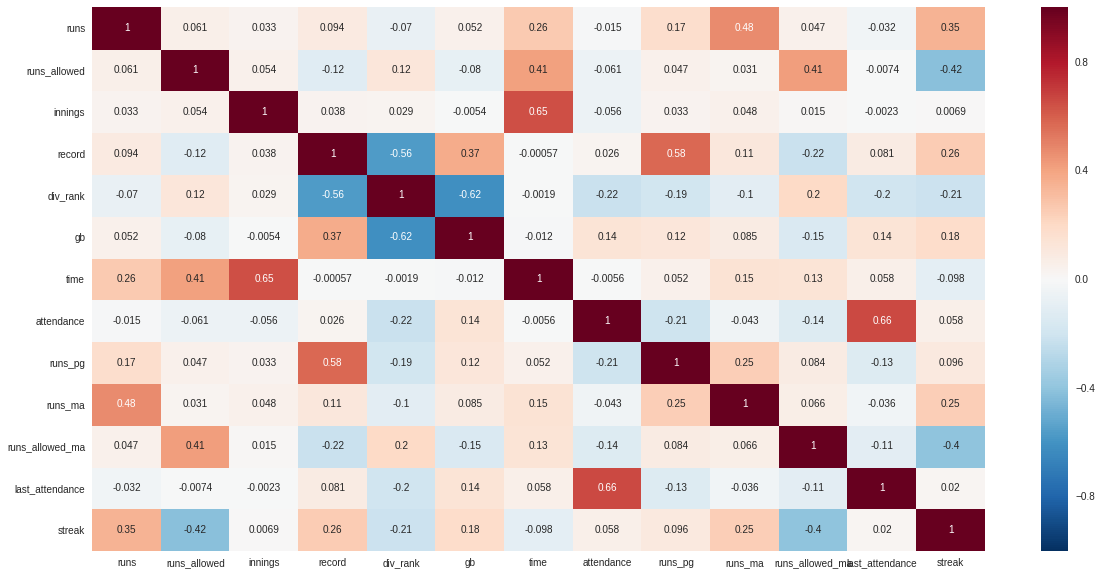

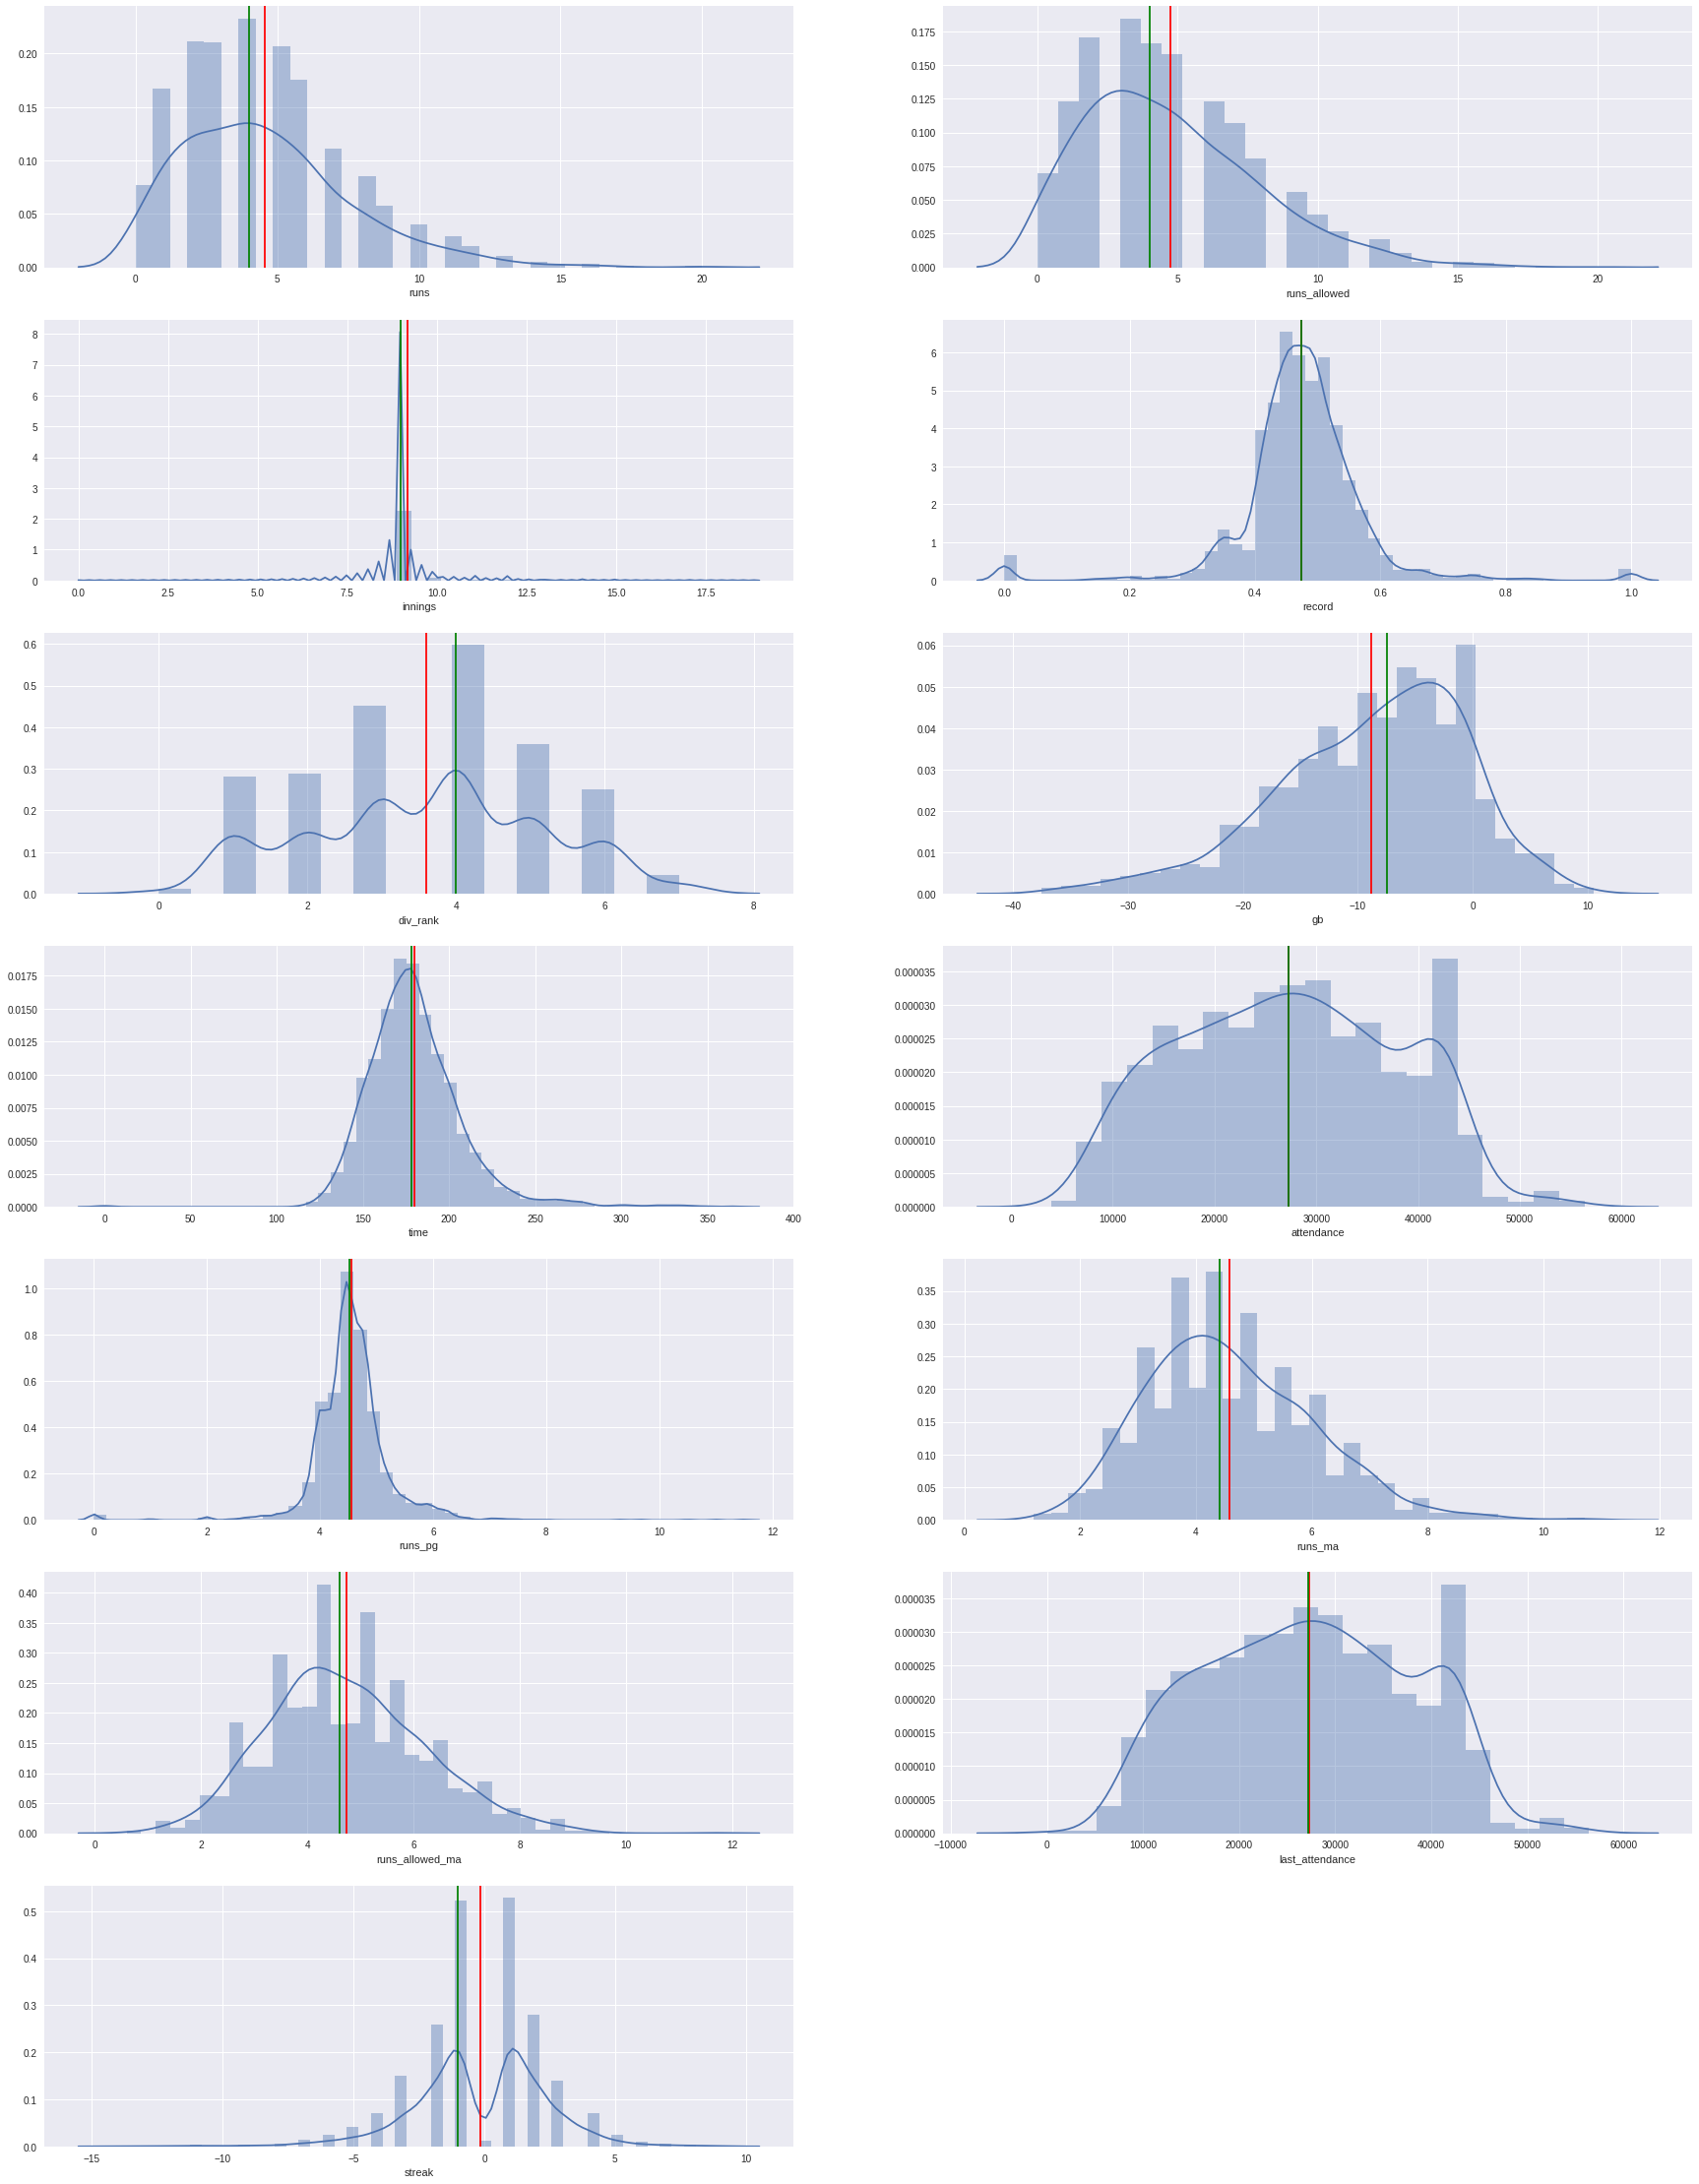

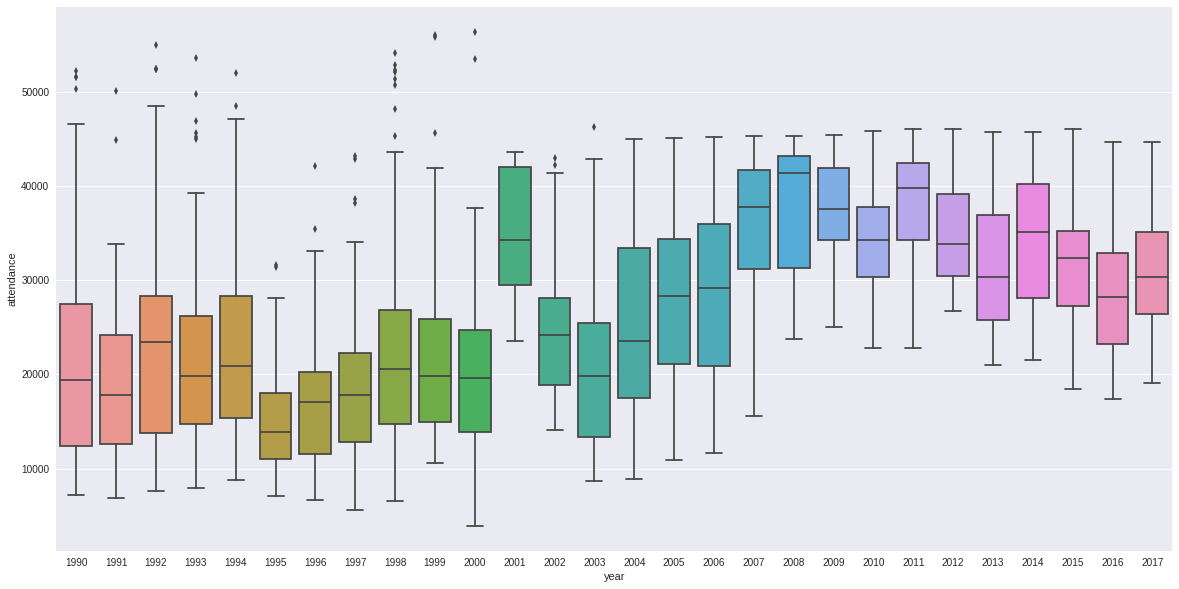

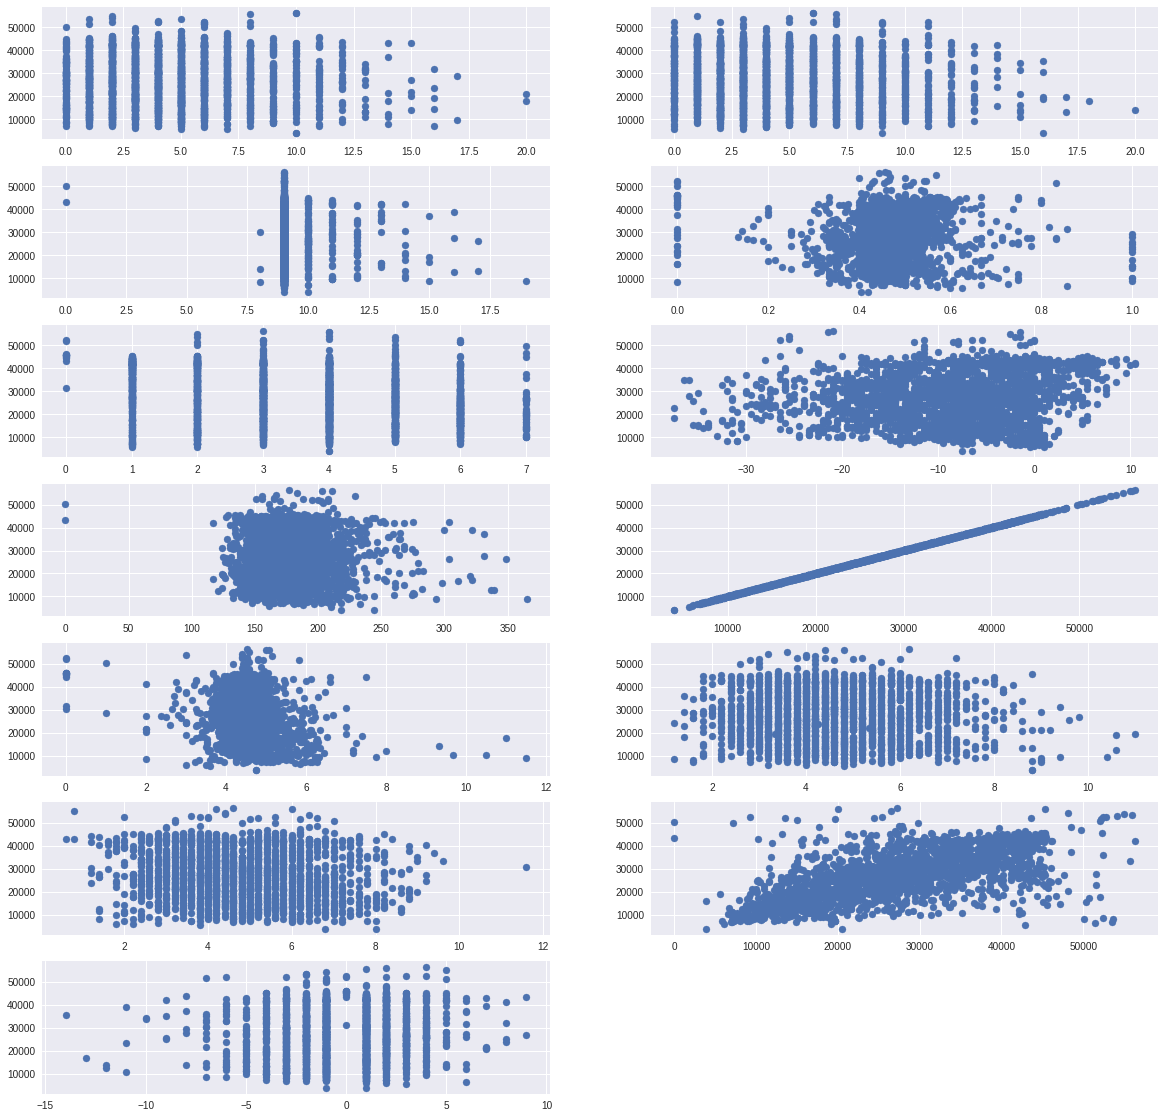

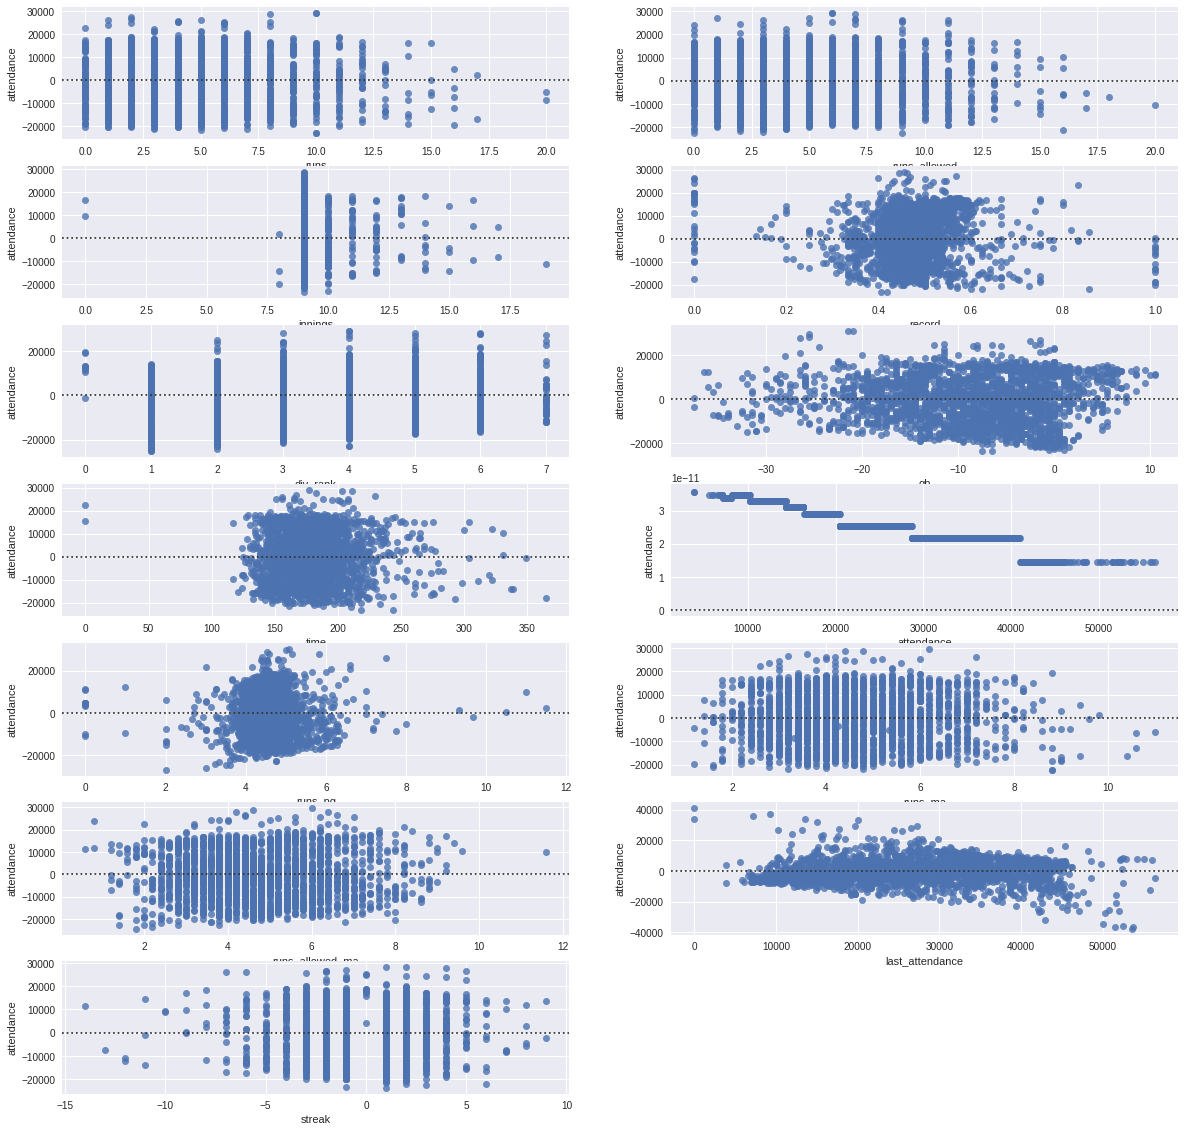

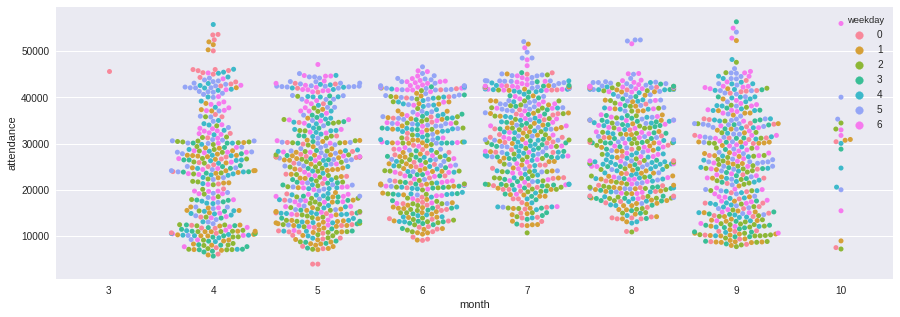

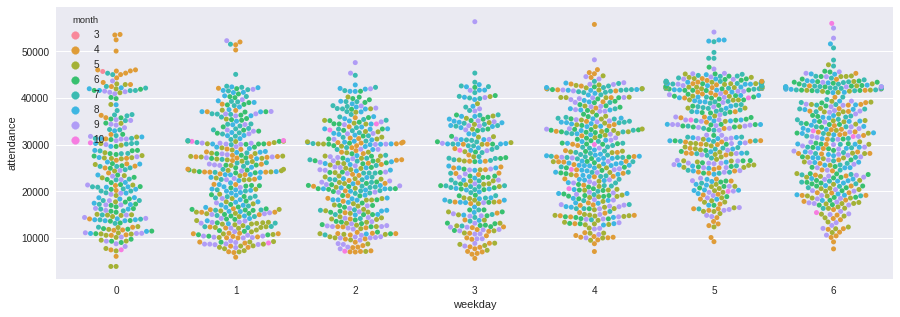

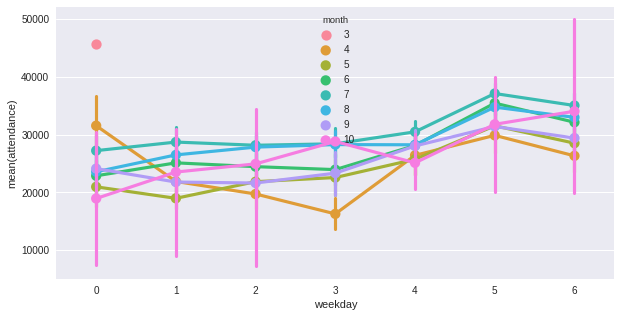

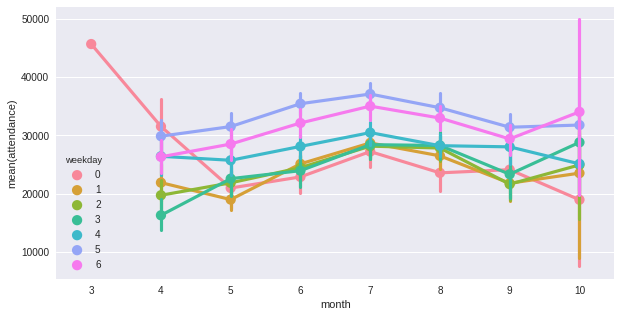

In [12]:
eda(brewers_data)

In [13]:
annual_mean_r2(brewers_data)

0.40906162991197659

In [14]:
brewers_data, feature, target = model_fit_ready(brewers_data)

In [15]:
bt = model_fit_score(feature, target)
bt

,train_score,test_score
Bagging_r2,0.924341,0.510305
Decision_tree_r2,1.000000,0.191988
Random_forest_r2,0.924487,0.500745
Gradient_boost_r2,0.761476,0.561467


In [16]:
co_f = feature.copy()
scale = StandardScaler()
feature_sca = pd.DataFrame(scale.fit_transform(co_f),columns=co_f.columns)

In [17]:
scale_fit = model_fit_score(feature_sca, target) 
scale_fit.columns =['scaled_train', 'scaled_test']
scale_fit

,scaled_train,scaled_test
Bagging_r2,0.930815,0.527494
Decision_tree_r2,1.000000,0.152141
Random_forest_r2,0.927462,0.514394
Gradient_boost_r2,0.761476,0.562044


In [18]:
score_table = pd.concat([bt, scale_fit],axis=1)

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', DecisionTreeRegressor(criterion='mse', max_depth=5, max_features='auto',
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='random'))))
Feature top 10 ranking:
1. last_attendance (0.697863)
2. SA (0.106515)
3. opening_day (0.086240)
4. time_N (0.030678)
5. april (0.018982)
6. 1995 (0.017437)
7. div_rank (0.012653)
8. F (0.010184)
9. M (0.009703)
10. 2017 (0.007548)


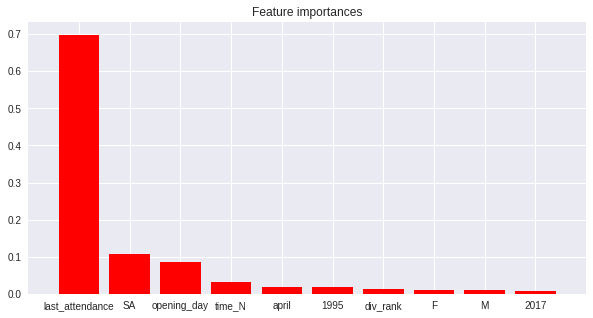

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=9,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=15, n_jobs=-1, oob_score=False, random_state=None,
           verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.716152)
2. SA (0.064108)
3. record (0.034477)
4. runs_pg (0.031285)
5. gb (0.024226)
6. M (0.018527)
7. time (0.014386)
8. time_D (0.014208)
9. runs_ma (0.011640)
10. F (0.011175)


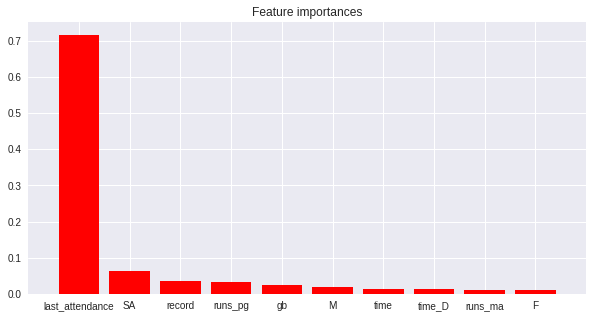

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='huber', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity...s=150, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False))))
Feature top 10 ranking:
1. last_attendance (0.193900)
2. runs_pg (0.059129)
3. SA (0.046925)
4. opening_day (0.045331)
5. streak (0.034196)
6. gb (0.033895)
7. M (0.028042)
8. F (0.027225)
9. record (0.026530)
10. runs_allowed_ma (0.026108)


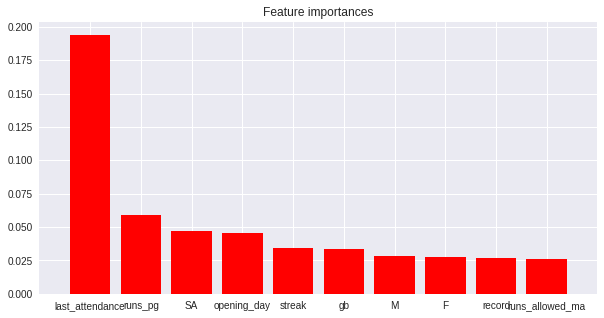

Pipeline(steps=(('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('model', BaggingRegressor(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=23, n_jobs=-1, oob_score=False, random_state=None,
         verbose=0, warm_start=False))))
Feature top 10 ranking:
1. div_rank (0.539898)
2. double_header (0.048065)
3. gb (0.045399)
4. opening_day (0.043169)
5. record (0.040197)
6. runs_allowed_ma (0.028060)
7. runs_ma (0.026997)
8. runs_pg (0.020964)
9. streak (0.020041)
10. 1990 (0.014229)


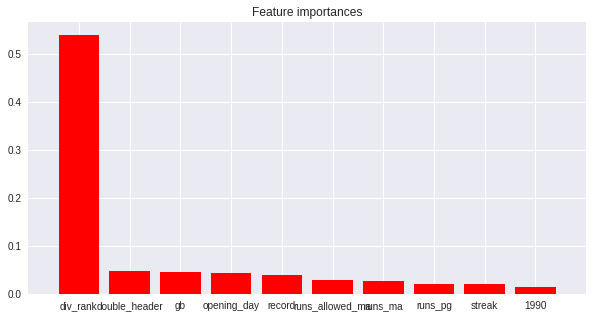

,train_score,test_score,scaled_train,scaled_test,P&O_train_score,P&O_test_score
Bagging_r2,0.924341,0.510305,0.930815,0.527494,0.942143,0.533782
Decision_tree_r2,1.000000,0.191988,1.000000,0.152141,0.574394,0.450869
Random_forest_r2,0.924487,0.500745,0.927462,0.514394,0.710677,0.504605
Gradient_boost_r2,0.761476,0.561467,0.761476,0.562044,0.771513,0.616528


In [19]:
grid_score(feature, target, score_table)

In [20]:
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(feature.values, i) for i in range(feature.shape[1])]
vif["features"] = feature_sca.columns

/opt/conda/lib/python3.6/site-packages/statsmodels/stats/outliers_influence.py:167: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/opt/conda/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1386: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


In [21]:
vif.sort_values('VIF',axis=0,ascending=False)[-16:-1]

,VIF,features
2,5.793690,gb
0,4.973945,div_rank
4,3.861860,record
7,3.366611,runs_pg
58,3.038431,time
56,2.610170,runs_allowed
55,2.526795,runs
8,2.387040,streak
57,2.374604,innings
54,2.294462,last_attendance


In [22]:
vif_feature = feature_sca.drop(['div_rank','gb'],axis=1)

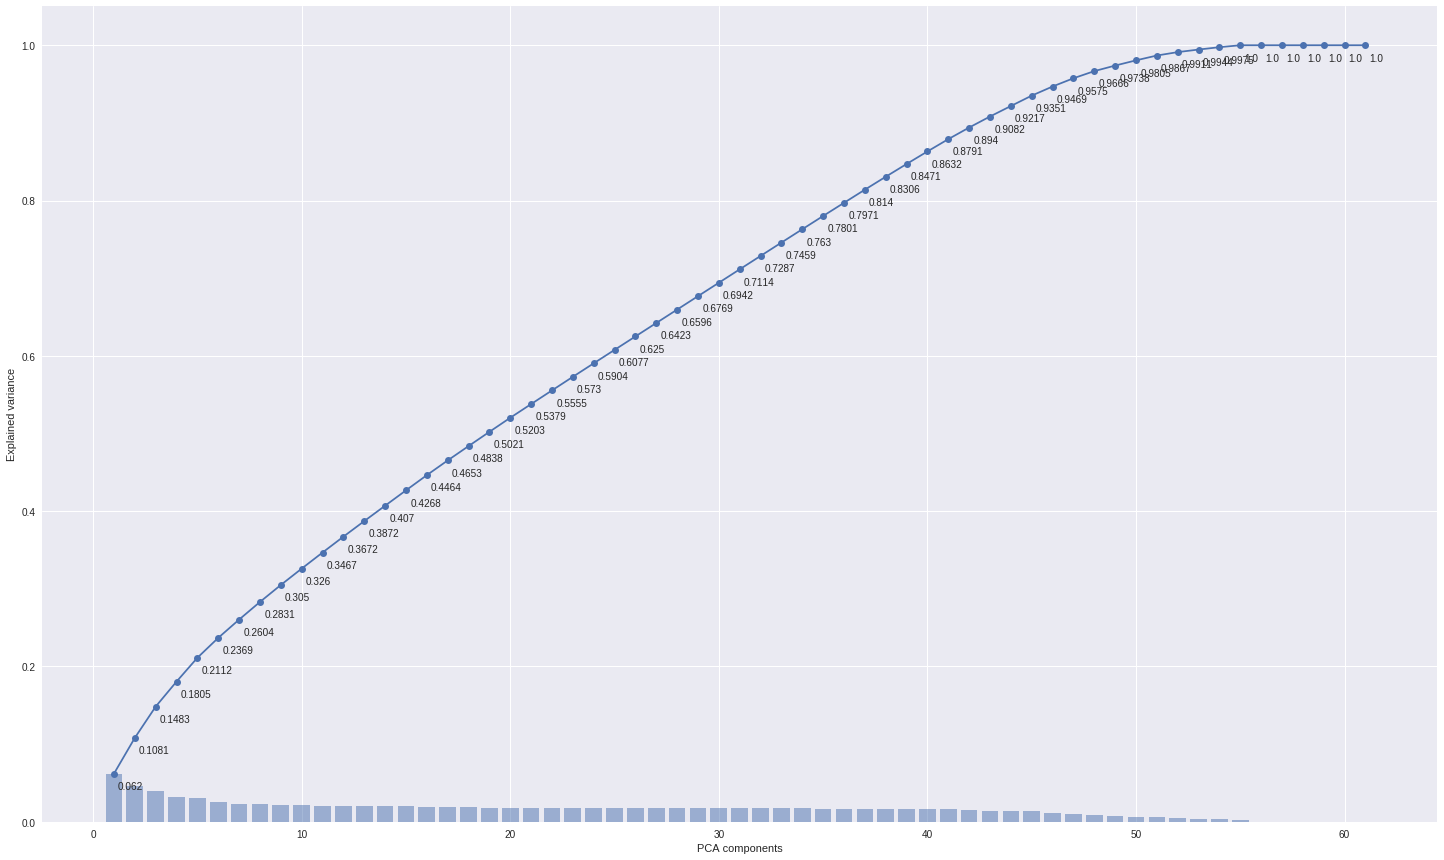

In [24]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(vif_feature))


plt.figure(figsize=(25,15))

X = np.arange(1,62)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [25]:
non_para_model_fit(vif_feature, target, 50)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.775602,0.000000
Support Vector Machine,0.707690,0.500817


In [26]:
inter_data, anova_feature, drop_list = interaction_feature(feature, target)

/opt/conda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/opt/conda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


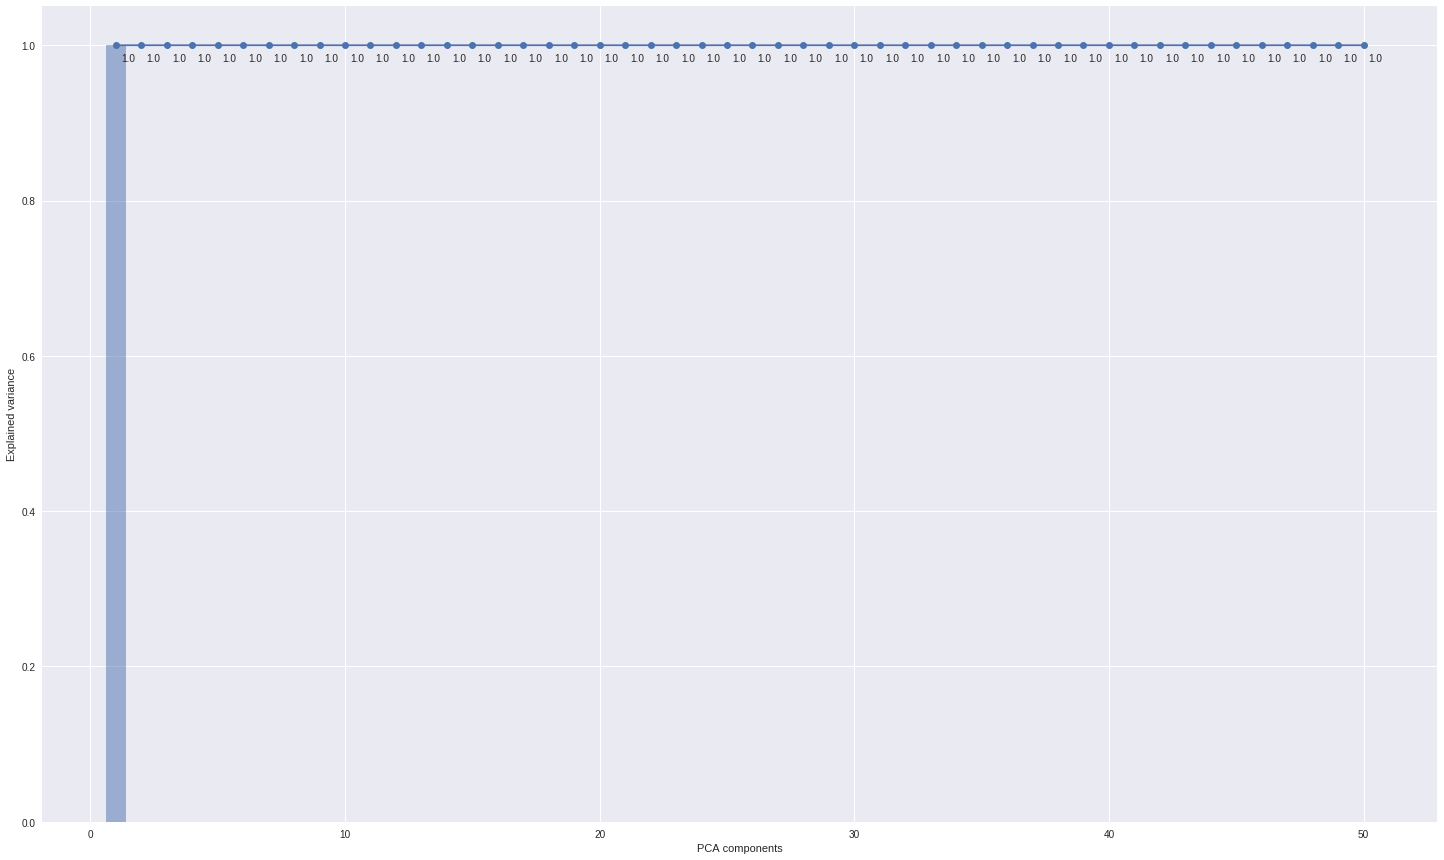

In [28]:
pca = PCA()
feature_pca = pd.DataFrame(pca.fit_transform(anova_feature))

plt.figure(figsize=(25,15))

X = np.arange(1,51)
cumulative_explained_variance_uci = np.cumsum(pca.explained_variance_ratio_)

plt.plot(X, cumulative_explained_variance_uci, '-o')
plt.bar(X, pca.explained_variance_ratio_, align='center', alpha=0.5)

for i, j in zip(X, np.cumsum(pca.explained_variance_ratio_)):
    plt.annotate(str(j.round(4)), xy=(i+.2,j-.02))
    
plt.xlabel('PCA components')
plt.ylabel('Explained variance')

In [29]:
non_para_model_fit(anova_feature, target, 1)

/opt/conda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:581: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)


,P&O_train_score,P&O_test_score
Logistic_Regression,0.004477,0.000000
Support Vector Machine,0.694607,0.598801
